In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

###### 2. Poisson distribution: $X \sim Poisson(\lambda)$

In [2]:
# Generate Poisson random variables

lam = 2;                                  # Poisson parameter (np)
nSim = 10000;                                # Number of simulations

np.random.seed(2)                      # Set the initial seed of the r.v. generator
rvSim = np.random.poisson(lam,nSim)      # Simulate Poisson r.v.'s given the average number of events in a given time interval


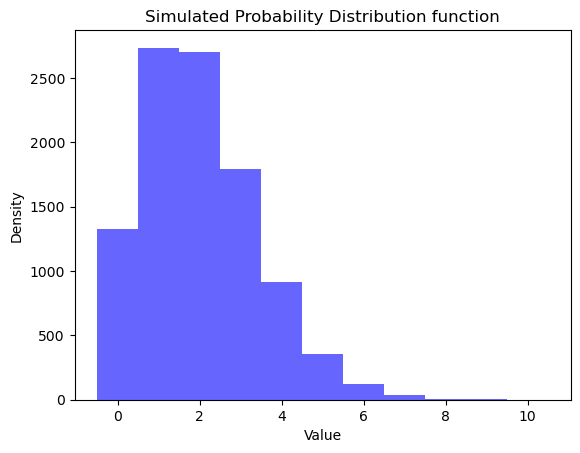

In [4]:
# Let us plot the histogram (PDF) using pyplot

binMin = np.min(rvSim)-0.5 # Check for the min result between simulations
binMax = np.max(rvSim)+0.5 # Check for the max result between simulations
binsIn = np.linspace(binMin, binMax, int(binMax-binMin+1)) # Count the outcomes and create a bin for each one

# Plot 
histValues,_,_ = plt.hist(x=rvSim, bins=binsIn, alpha=0.6, color='blue')
plt.title("Simulated Probability Distribution function")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

#print(binsIn)
#print(histValues)

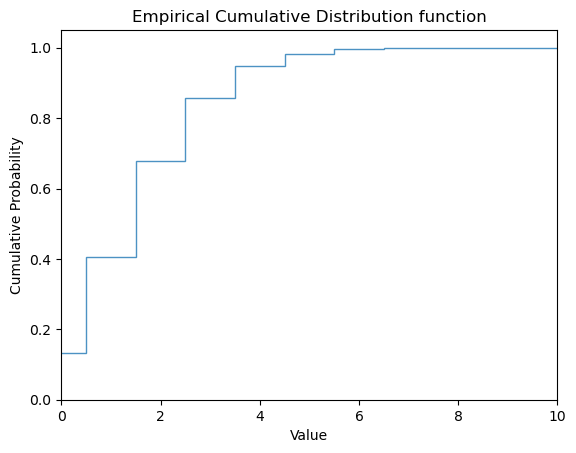

[0.1329 0.4064 0.6769 0.8558 0.9475 0.983  0.9951 0.9989 0.9997 0.9999
 1.    ]


In [5]:
# Let us plot the cumulative distribution function (CDF) using  pyplot

cumValues,_,_ = plt.hist(x=rvSim, bins=binsIn, alpha=0.8, rwidth=0.2, cumulative=True, density=True, histtype='step')
plt.title("Empirical Cumulative Distribution function")
plt.xlim(0,np.max(rvSim))
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.show()
print(cumValues)

In [6]:
# We now compare the sample mean and sample variance with the population mean and variance

print(np.mean(rvSim))    # sample mean
print(np.var(rvSim))     # sample variance
print(st.skew(rvSim))      #  sample skewness
print(st.kurtosis(rvSim))  # sample kurtosis

print(lam)               # population mean (Expected Value)
print(lam)               # population variance (Variance)
print(1 / np.sqrt(lam))  # population skewness
print(1 / lam)           # population kurtosis
# Observe that the sample mean and variance get closer and closer to their population value as nSim increases

2.0039
2.0038847900000003
0.7236841206625013
0.5582865278312186
2
2
0.7071067811865475
0.5


###### 3. Cauchy distribution: $X \sim Cauchy(x_0, \gamma)$


In [7]:
# Parameters of the Cauchy distribution
x0 = 0         # location parameter
gamma = 1     # scale parameter
nSim = 10000  # number of simulations

np.random.seed(12345)                          # Set the initial seed for the random variable generator
rvSim = st.cauchy.rvs(loc=x0, scale=gamma, size=nSim)  # Simulate Cauchy random variables with specified parameters

# Optional: Print the generated random variables
#print(rvSim)

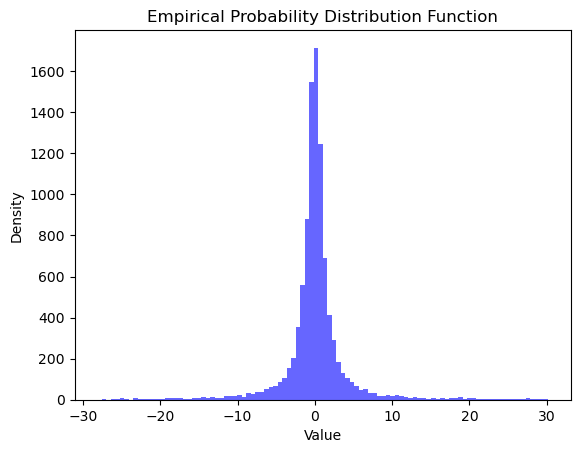

In [8]:
# Define a reasonable range for visualization, ignoring extreme tails
plot_min = np.percentile(rvSim, 1)  # 1st percentile to cut extreme left tail
plot_max = np.percentile(rvSim, 99) # 99th percentile to cut extreme right tail

# Generate histogram within this range
plt.hist(rvSim, bins=100, range=(plot_min, plot_max), alpha=0.6, color='blue')

# Plot settings
plt.title("Empirical Probability Distribution Function")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

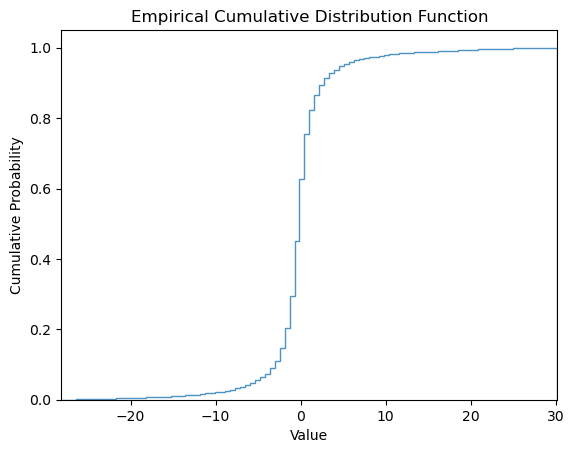

In [12]:
# Define a reasonable range for visualization, ignoring extreme tails
plot_min = np.percentile(rvSim, 1)  # 1st percentile to ignore extreme left tail
plot_max = np.percentile(rvSim, 99) # 99th percentile to ignore extreme right tail

# Plot cumulative histogram (CDF)
cumValues, _, _ = plt.hist(x=rvSim, bins=100, range=(plot_min, plot_max), alpha=0.8, 
                           cumulative=True, density=True, histtype='step')

# Plot settings
plt.title("Empirical Cumulative Distribution Function")
plt.xlim(plot_min, plot_max)
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.show()

In [13]:
# Note: For the Cauchy distribution, the population mean and variance are undefined.
# Theoretical skewness and kurtosis are also not applicable for a Cauchy distribution.

# Calculate sample median and interquartile range (IQR)
sample_median = np.median(rvSim)  # Sample median
iqr = np.percentile(rvSim, 75) - np.percentile(rvSim, 25)  # Interquartile range (IQR)

# Print the results
print("Sample median:", sample_median)     # Sample median
print("Interquartile range (IQR):", iqr)   # IQR as a measure of dispersion

# these statistics provide a measure of central tendency and dispersion for the Cauchy distribution


Sample median: 0.008410064154688483
Interquartile range (IQR): 2.046211109717546


###### 3. Central limit theorem - Empirical demonstration

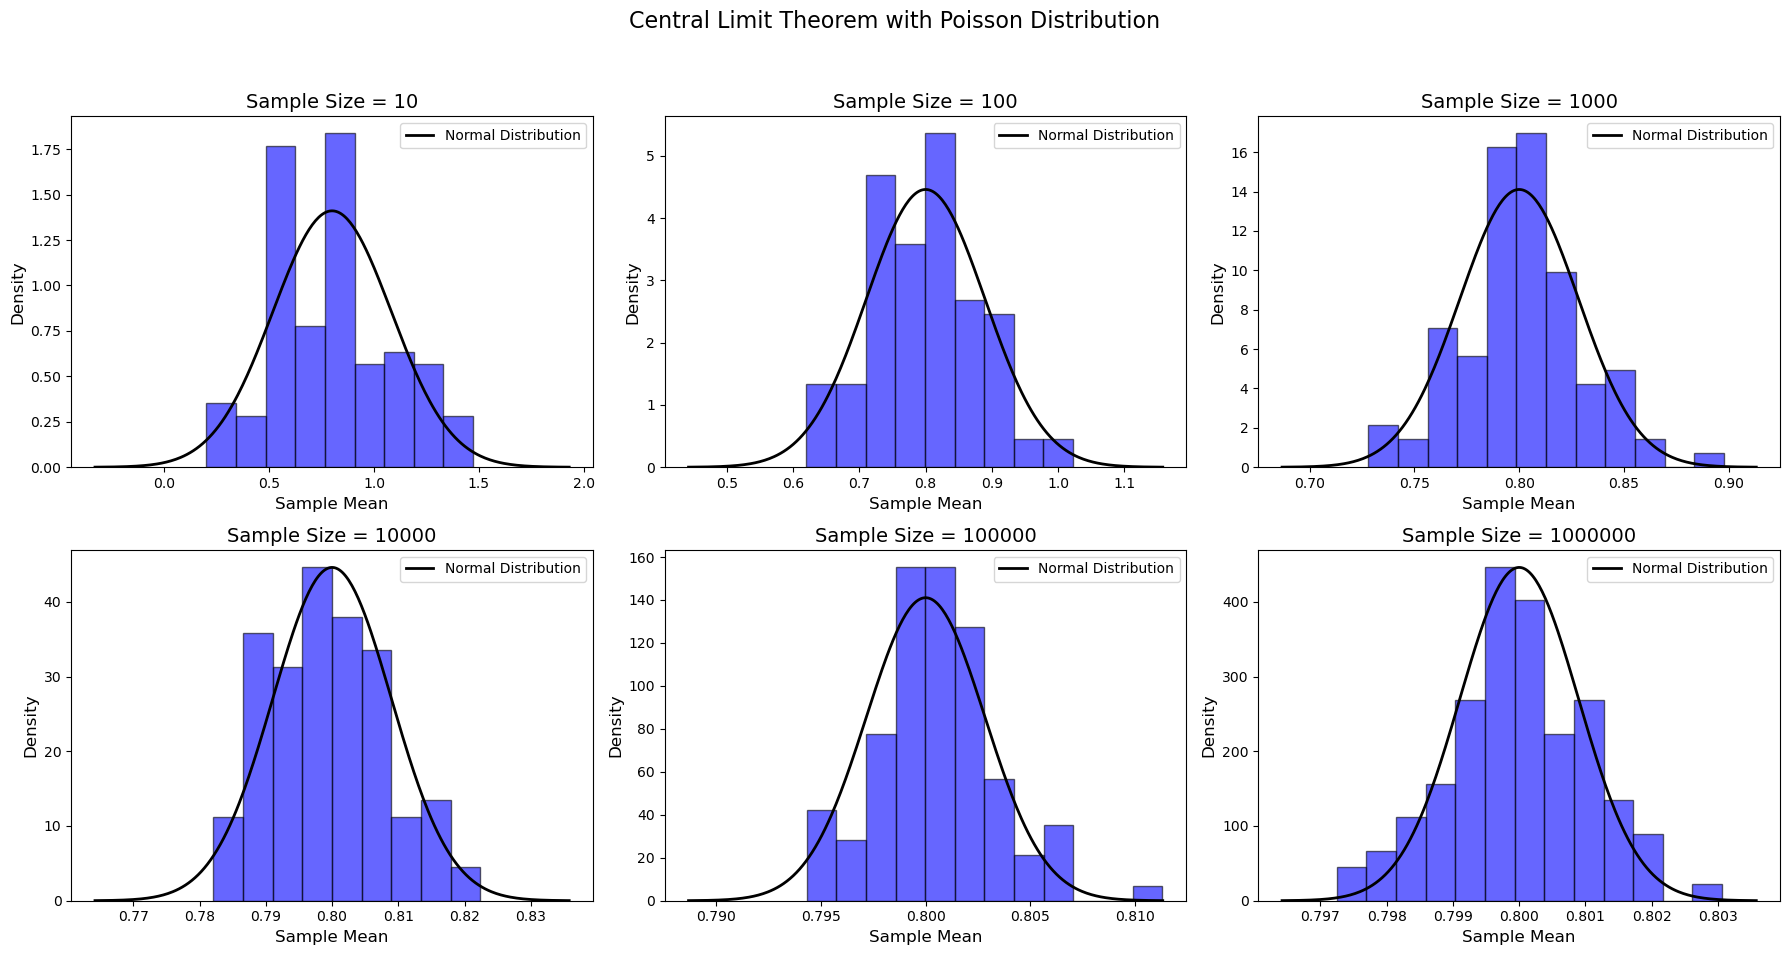

In [14]:
# Set up parameters for the Poisson distribution and experiment: 
# Generate 100 times a sample of (n) elements, and compute the mean, then store the mean, and represent the means on a histogram. 

lam = 0.8  # Average rate of occurrence in the Poisson distribution

nSimulations = 100  # Number of averages we will calculate for each sample size
# List of sample sizes we want to test (n)
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

# Dictionary to store the averages for each sample size
means = {}

# Seed the random generator for consistent results each time
np.random.seed(42)

# Loop over each sample size
for elem in sample_sizes:
    # Create an empty list to store averages for the current sample size
    sample_means = []
    
    # Run 100 simulations for the current sample size
    for _ in range(nSimulations):
        # Generate 'sample_size' Poisson random variables
        sample = np.random.poisson(lam, elem)
        # Calculate the mean of this sample and add it to the list of means
        sample_means.append(np.mean(sample))
    
    # Store the list of means in the dictionary, using the sample size as the key
    means[elem] = sample_means

# Set up a 2x3 grid of plots (2 rows, 3 columns) to display histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the 2x3 grid of axes to a simple list for easier access
axes = axes.flatten()

# Loop through each sample size to create a histogram in each subplot
for i in range(len(sample_sizes)):
    # Get the sample size and corresponding subplot
    sample_size = sample_sizes[i]
    ax = axes[i]  # Select the subplot using the index i directly

    # Calculate the standard deviation of sample means for this sample size
    sigma = np.sqrt(lam / sample_size)
    
    # Define the width of each histogram bin for smooth distribution
    bin_width = sigma / 2
    bins = np.arange(min(means[sample_size]), max(means[sample_size]) + bin_width, bin_width)
    
    # Plot the histogram of sample means
    ax.hist(means[sample_size], bins=bins, density=True, alpha=0.6, color='blue', edgecolor='black')
    
    # Calculate the theoretical normal distribution for overlay
    mu = lam  # The theoretical mean of the sample means
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 300)  # Range for the x-axis
    ax.plot(x, st.norm.pdf(x, mu, sigma), 'k-', linewidth=2, label='Normal Distribution')  # Normal curve
    
    # Add title and labels for each subplot
    ax.set_title(f'Sample Size = {sample_size}', fontsize=14)
    ax.set_xlabel('Sample Mean', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend()

# Add an overall title for the entire figure
plt.suptitle("Central Limit Theorem with Poisson Distribution", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

###### 4. Law of Large Numbers - Empirical demonstration

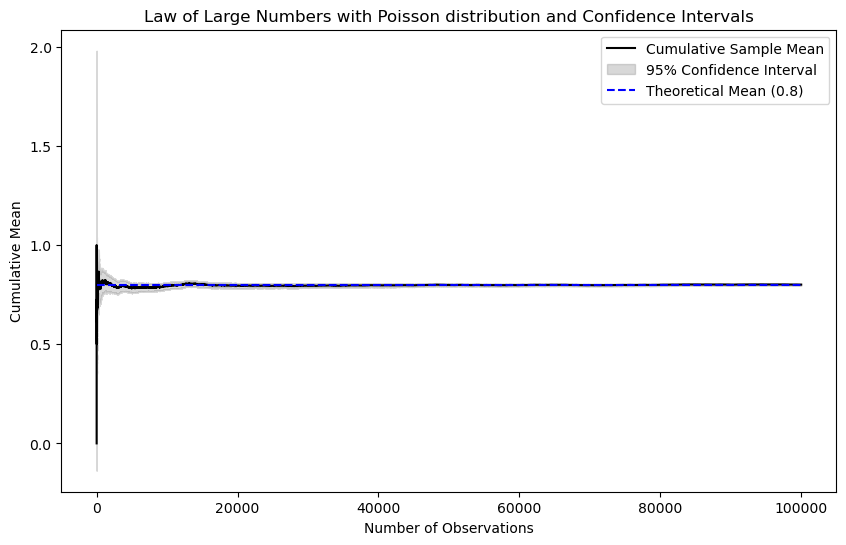

In [15]:
# Parameter of the Poisson distribution
lam = 0.8  # Theoretical mean

# Maximum number of observations (total sample size)
n_observations = 100000

# Generate a sample of 1,000 observations from the Poisson distribution
np.random.seed(42)  # Set seed for reproducibility
sample = np.random.poisson(lam, n_observations)

# Calculate the cumulative mean as more observations are added
cumulative_means = np.cumsum(sample) / np.arange(1, n_observations + 1)

# Confidence level and z-score for 95% confidence interval
alpha = 0.05
z_score = st.norm.ppf(1 - alpha / 2)

# Calculate the cumulative standard deviation of the sample mean
cumulative_std_dev = np.sqrt(np.cumsum((sample - cumulative_means)**2) / np.arange(1, n_observations + 1))

# Calculate the confidence intervals for each cumulative mean
confidence_intervals = z_score * cumulative_std_dev / np.sqrt(np.arange(1, n_observations + 1))

# Plot the cumulative mean with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(cumulative_means, label="Cumulative Sample Mean", color='k')
plt.fill_between(range(n_observations), cumulative_means - confidence_intervals, cumulative_means + confidence_intervals, color='gray', alpha=0.3, label="95% Confidence Interval")
plt.hlines(lam, xmin=0, xmax=n_observations, colors='blue', linestyles='dashed', label="Theoretical Mean (0.8)")

# Plot settings
plt.title("Law of Large Numbers with Poisson distribution and Confidence Intervals")
plt.xlabel("Number of Observations")
plt.ylabel("Cumulative Mean")
plt.legend()
plt.show()

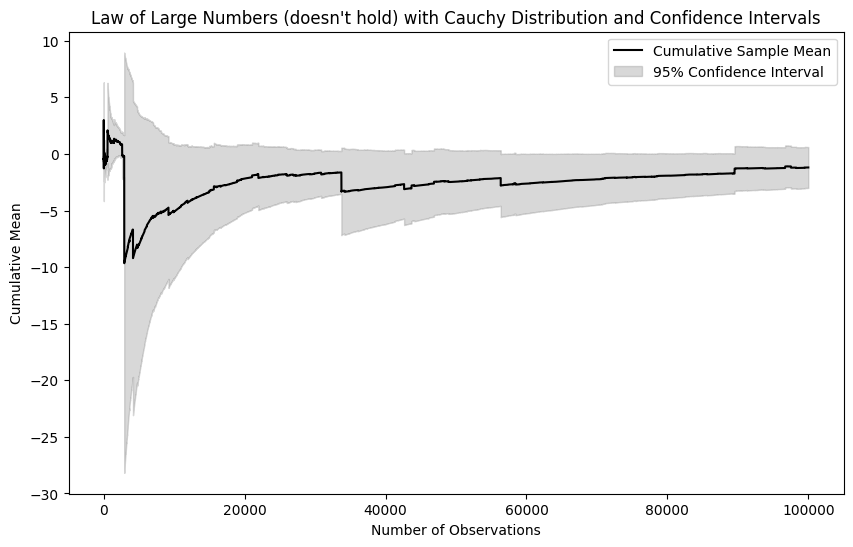

In [95]:
# Maximum number of observations
n_observations = 100000

# Generate a sample of 1,000 observations from the standard Cauchy distribution using scipy
np.random.seed(42)  # Set seed for reproducibility
sample = st.cauchy.rvs(size=n_observations)

# Calculate the cumulative mean as more observations are added
cumulative_means = np.cumsum(sample) / np.arange(1, n_observations + 1)

# Confidence level and z-score for 95% confidence interval
alpha = 0.05
z_score = st.norm.ppf(1 - alpha / 2)

# Calculate the cumulative standard deviation of the sample mean
cumulative_std_dev = np.sqrt(np.cumsum((sample - cumulative_means) ** 2) / np.arange(1, n_observations + 1))

# Calculate the confidence intervals for each cumulative mean
confidence_intervals = z_score * cumulative_std_dev / np.sqrt(np.arange(1, n_observations + 1))

# Plot the cumulative mean with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(cumulative_means, label="Cumulative Sample Mean", color='k')
plt.fill_between(range(n_observations), cumulative_means - confidence_intervals, cumulative_means + confidence_intervals, color='gray', alpha=0.3, label="95% Confidence Interval")

# Plot settings
plt.title("Law of Large Numbers (doesn't hold) with Cauchy Distribution and Confidence Intervals")
plt.xlabel("Number of Observations")
plt.ylabel("Cumulative Mean")
plt.legend()
plt.show()